# ESCAPE Summer School Validation Lecture Excercises

## Figures of Merit

COVID-19 self test says 


| PCR reference | self test positive | self test negative |
|---------------|--------------------|--------------------|
| positive      |                103 |                  5 |
| negative      |                  1 |                114 |


In [1]:
import numpy as np
confusionmatrix = np.array ([[103, 5],[1,114]])
print(confusionmatrix)

[[103   5]
 [  1 114]]


sensitivity & specificity: 

In [2]:
sens, spec = np.diag(confusionmatrix) / np.sum(confusionmatrix, axis=1)
print(sens)
print(spec)

0.9537037037037037
0.991304347826087


In [3]:
PPV, NPV = np.diag(confusionmatrix) / np.sum(confusionmatrix, axis=0)
print(PPV)
print(NPV)

0.9903846153846154
0.957983193277311


but: current incidence is 11.6 cases / (100k inhabitants * week) 
assume 3 days until detected 

In [4]:
incidence = 11.6 / 100000 / 7 # per inhabitant and day
prob_true_pos = incidence * 3 + incidence * 1.0 * 8  
print(prob_true_pos)
print(1/prob_true_pos)

0.00018228571428571428
5485.8934169279


In [5]:
confusionmatrix_incidence_corr = confusionmatrix / np.sum(confusionmatrix, axis=1, keepdims=True)
print(confusionmatrix_incidence_corr)

confusionmatrix_incidence_corr [0, :] *= prob_true_pos
confusionmatrix_incidence_corr [1, :] *= (1 - prob_true_pos)
print(confusionmatrix_incidence_corr)

[[0.9537037  0.0462963 ]
 [0.00869565 0.99130435]]
[[1.73846561e-04 8.43915344e-06]
 [8.69406708e-03 9.91123647e-01]]


In [6]:
np.diag(confusionmatrix_incidence_corr) / np.sum(confusionmatrix_incidence_corr, axis=1)

array([0.9537037 , 0.99130435])

In [7]:
PPV, NPV = np.diag(confusionmatrix_incidence_corr) / np.sum(confusionmatrix_incidence_corr, axis=0)
print(PPV)
print(NPV)

0.01960399794955076
0.999991485339285


probability positive test is correct 1 / 51
odds positive test is correct 1 : 50
odds person is infected 1 : 5500

In [8]:
LR_pos = sens / (1 - spec)
print(LR_pos)
LR_neg = spec / (1 - sens)
print(LR_neg)

109.67592592592656
21.412173913043485


In [9]:
print(confusionmatrix)
print(sens)
import astropy.stats as ap
ap.binom_conf_interval(confusionmatrix[0,0], sum(confusionmatrix[0,:]), interval='flat')

[[103   5]
 [  1 114]]
0.9537037037037037


array([0.92428858, 0.96657356])

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Hyperparameter Optimization

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()

In [12]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(digits ["data"], 
                                                                    digits["target"], 
                                                                    test_size=0.3)



In [13]:
from sklearn.svm import SVC
svc = SVC(gamma=0.001)

# training
svc.fit(data_train, labels_train)

# looking at prediction on training set
predicted_train = svc.predict(data_train)

# looking at prediction on test set
predicted_test = svc.predict(data_test)

In [14]:
from sklearn.model_selection import GridSearchCV

C = [0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.1, 0.01, 0.001, 0.0001]

param_grid = [{'C': C, 'gamma': gamma, 'kernel': ['rbf']}]
gridsearch = GridSearchCV (cv = 5, estimator = svc, param_grid = param_grid)
gridsearch.fit(data_train, labels_train)


GridSearchCV(cv=5, estimator=SVC(gamma=0.001),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [15]:
gridsearch.cv_results_

{'mean_fit_time': array([0.12310386, 0.1077363 , 0.10245843, 0.10379744, 0.13533335,
        0.10925674, 0.06872773, 0.09288316, 0.14649372, 0.12242613,
        0.04027753, 0.03505459, 0.16060395, 0.12452927, 0.04514484,
        0.0271956 , 0.17098575, 0.12925768, 0.04306154, 0.02146044,
        0.16490765, 0.12777715, 0.04137449, 0.02141948]),
 'std_fit_time': array([0.00163019, 0.00297628, 0.0005479 , 0.00350861, 0.00348465,
        0.00252165, 0.00153069, 0.00398996, 0.00133984, 0.00074048,
        0.00037135, 0.0004866 , 0.00221847, 0.00445194, 0.00173201,
        0.00415541, 0.00650508, 0.00351062, 0.00146481, 0.00062304,
        0.00943852, 0.00431044, 0.0007049 , 0.00077202]),
 'mean_score_time': array([0.01964121, 0.02005811, 0.02000289, 0.02009354, 0.0200861 ,
        0.02142658, 0.01647477, 0.02041249, 0.01985106, 0.01999826,
        0.0115459 , 0.01435156, 0.02072716, 0.02070045, 0.01247578,
        0.01131225, 0.0219645 , 0.0232161 , 0.01294379, 0.00840816,
        0.022342

In [16]:
mean_score = gridsearch.cv_results_ ["mean_test_score"].reshape (len(C),len(gamma))
print(mean_score)
std_score = gridsearch.cv_results_ ["std_test_score"].reshape (len(C),len(gamma))
print(std_score)
C_mat = gridsearch.cv_results_["param_C"].reshape(len(C),len(gamma))
gamma_mat  = gridsearch.cv_results_["param_gamma"].reshape(len(C),len(gamma))

[[0.11615127 0.11615127 0.11615127 0.11615127]
 [0.11615127 0.11615127 0.96181623 0.7708942 ]
 [0.11615127 0.63799722 0.98647632 0.96659394]
 [0.11615127 0.67380636 0.9880731  0.98090811]
 [0.11615127 0.67380636 0.9880731  0.98329223]
 [0.11615127 0.67380636 0.9880731  0.98329223]]
[[0.00169775 0.00169775 0.00169775 0.00169775]
 [0.00169775 0.00169775 0.01770488 0.01462466]
 [0.00169775 0.03180139 0.00736689 0.01922009]
 [0.00169775 0.02435602 0.00561201 0.01538191]
 [0.00169775 0.02435602 0.00561201 0.01107977]
 [0.00169775 0.02435602 0.00561201 0.01107977]]


Figure(432x288)


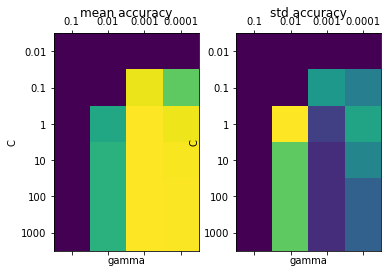

In [24]:
import matplotlib.pyplot as plt

import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(mean_score)
ax1.set_xticks(np.arange(len(gamma)))
ax1.set_xticklabels(gamma)
ax1.set_xlabel("gamma")
ax1.set_yticks(np.arange(len(C)))
ax1.set_yticklabels(C)
ax1.set_ylabel("C")
ax1.set_title("mean accuracy")

ax2.matshow(std_score)
ax2.set_xticks(np.arange(len(gamma)))
ax2.set_xticklabels(gamma)
ax2.set_xlabel("gamma")
ax2.set_yticks(np.arange(len(C)))
ax2.set_yticklabels(C)
ax2.set_ylabel("C")
ax2.set_title("std accuracy")
print(fig)